In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = df.iloc[:,3:5].values

In [4]:
#using the elbow method to find the no of clusters k
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

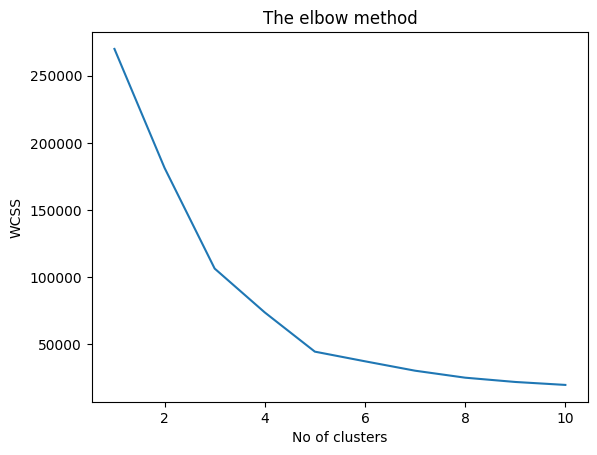

In [5]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
k = 5
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0,n_init=10,max_iter=300)
ykmeans = kmeans.fit_predict(x)

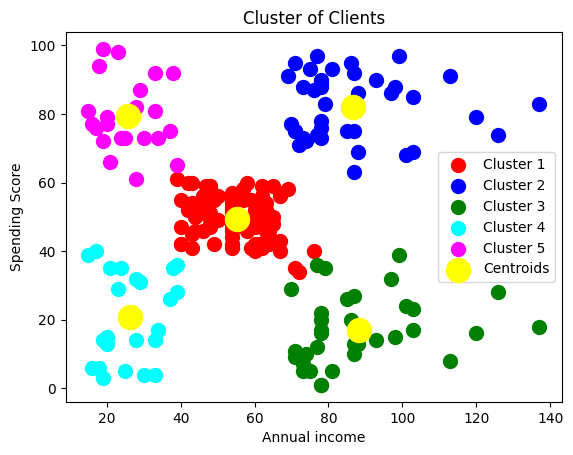

In [11]:
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[ykmeans==3,0],x[ykmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(x[ykmeans==4,0],x[ykmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()